# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

--2021-03-21 23:27:57--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66767 (65K) [image/png]
Saving to: ‘kwadraty.png’

kwadraty.png        100%[===================>]  65.20K  --.-KB/s    in 0.01s   

2021-03-21 23:27:57 (5.17 MB/s) - ‘kwadraty.png’ saved [66767/66767]

--2021-03-21 23:27:57--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123336 (120K) [image/png]
Sa

(-0.5, 63.5, 63.5, -0.5)

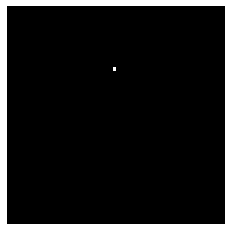

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import math
import os

if not os.path.exists("kwadraty.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

In [3]:
im_hough, theta, rho = hough_line(im)

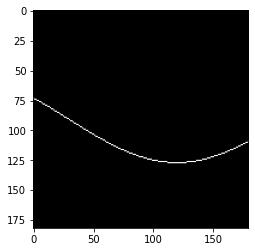

In [4]:
plt.imshow(im_hough, cmap='gray')

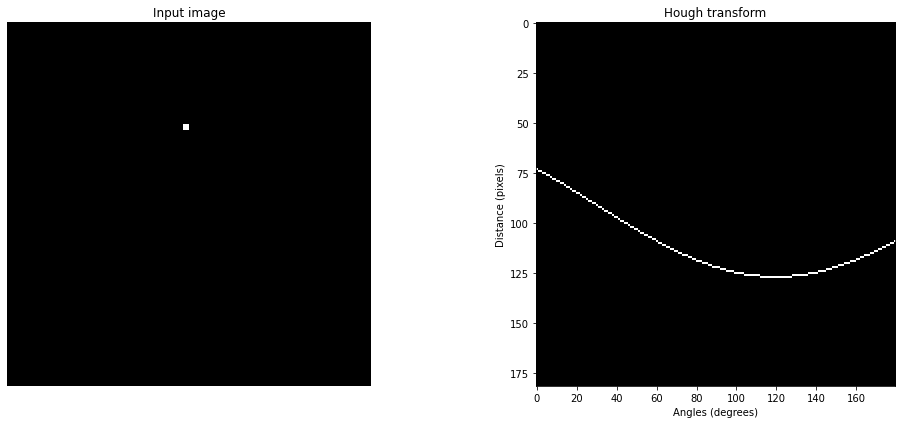

In [5]:
show_hough(im_hough, im)

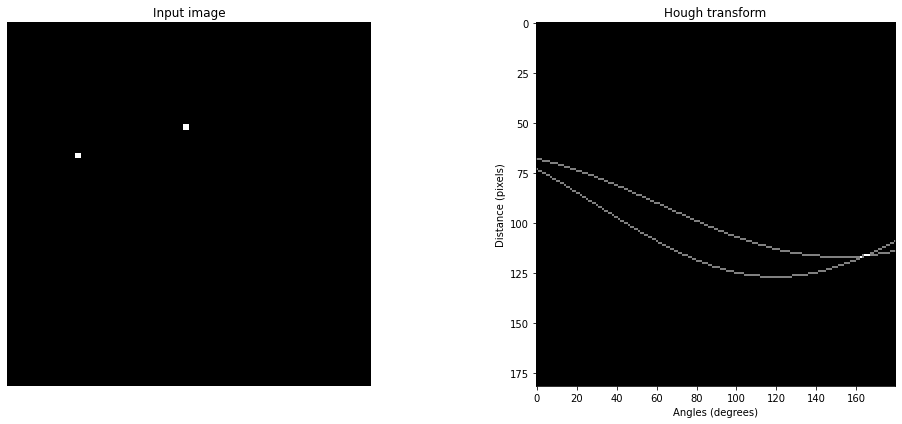

In [6]:
im[23,12] = 1
im2_hough, theta2, rho2 = hough_line(im)

show_hough(im2_hough, im)

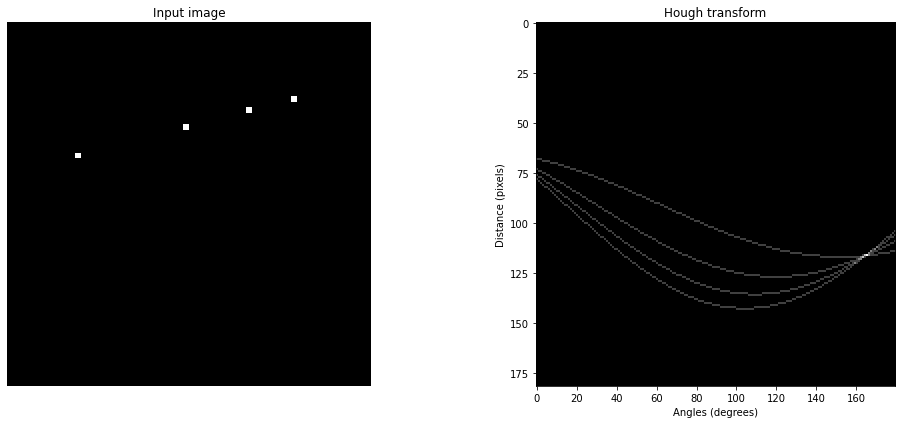

In [7]:
im[13,50] = 1
im[15,42] = 1

im3_hough, theta3, rho3 = hough_line(im)
show_hough(im3_hough, im)

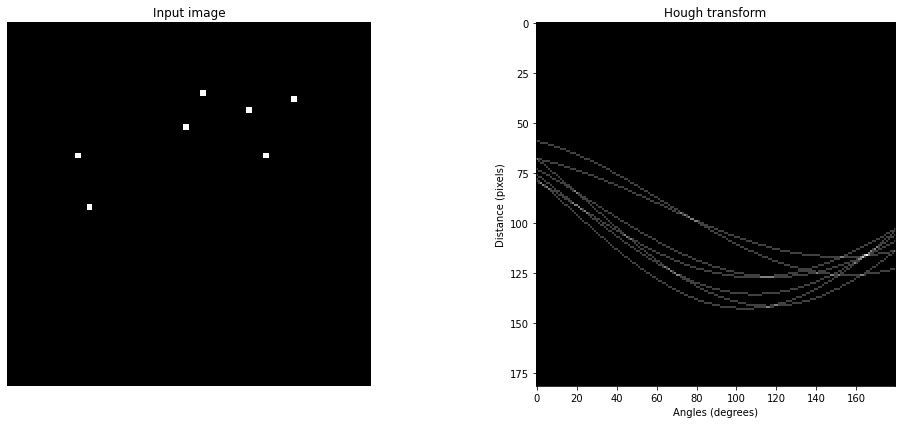

In [8]:
im[12,34] = 1
im[23,45] = 1
im[32,14] = 1

im4_hough, theta4, rho4 = hough_line(im)
show_hough(im4_hough, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

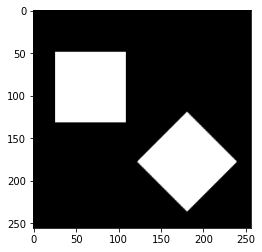

In [9]:
kwadraty = plt.imread('kwadraty.png')
plt.imshow(kwadraty, cmap='gray')

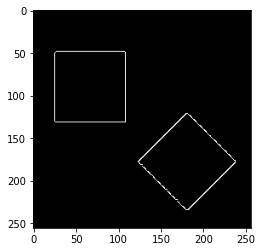

In [10]:
kwadraty = cv2.Canny(np.uint8(kwadraty), 0, 0, None, 3, 1)
plt.imshow(kwadraty, cmap='gray')
plt.show()

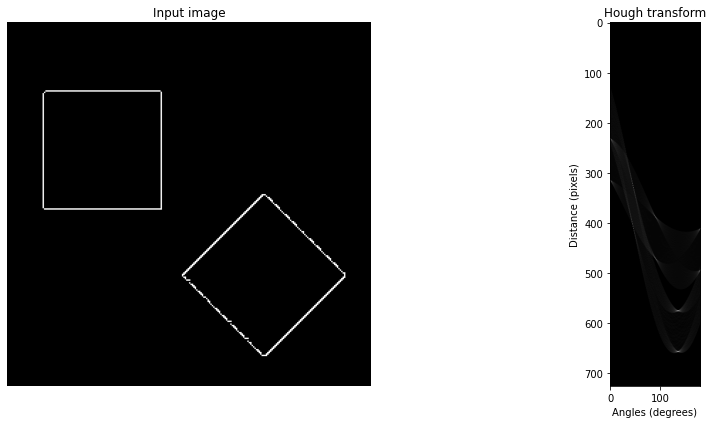

In [11]:
kw_hough, kw_theta, kw_rho = hough_line(kwadraty)
show_hough(kw_hough, kwadraty)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

(array([86, 81, 77, 76, 74, 63, 60, 59], dtype=uint64), array([ 1.57079633,  1.57079633,  0.78101046, -0.0087754 ,  0.0087754 ,
        0.79856126, -0.78101046, -0.79856126]), array([131.68137931,  48.56689655, 294.9062069 , 107.64827586,
        26.53655172, 212.79310345,  44.56137931, -41.55724138]))


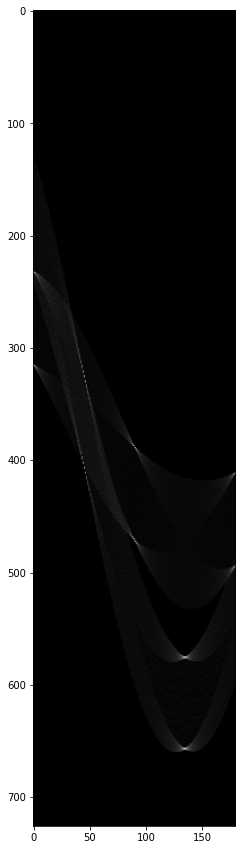

In [12]:
peaks = hough_line_peaks(kw_hough, kw_theta, kw_rho)
print(peaks)

fig,ax = plt.subplots(1, figsize=(12,15))

ax.set_aspect('equal')
ax.imshow(kw_hough, 'gray')
plt.show()

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:


**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

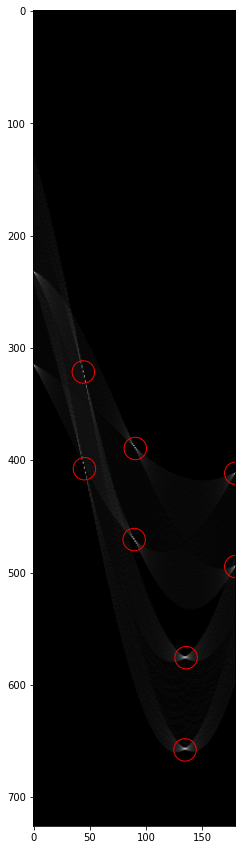

In [13]:
_, ax = plt.subplots(1, figsize=(10,15))
plt.imshow(kw_hough, cmap='gray')


for theta, rho in zip(*hough_line_peaks(kw_hough, kw_theta, kw_rho)[1:3]):
  x = (theta+np.pi/2)*180/np.pi
  y = rho + kw_hough.shape[0]/2
  circle = plt.Circle((x, y), 10, color='r', fill=False)
  ax.add_patch(circle)
plt.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

In [14]:
# z pomocą dokumentacji

def show_lines(img, threshold = 45, minLineLength=40, maxLineGap=5):
  dst = cv2.Canny(img, 0, 1, None, 3)
    
    # Copy edges to the images that will display the results in BGR
  cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
  lines = cv2.HoughLines(dst, 1, np.pi / 180, threshold, minLineLength, maxLineGap)
    

  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(cdst, pt1, pt2, (0,0,255), 1)

  plt.figure(figsize=(10, 10))
  plt.imshow(cdst)
  plt.show()

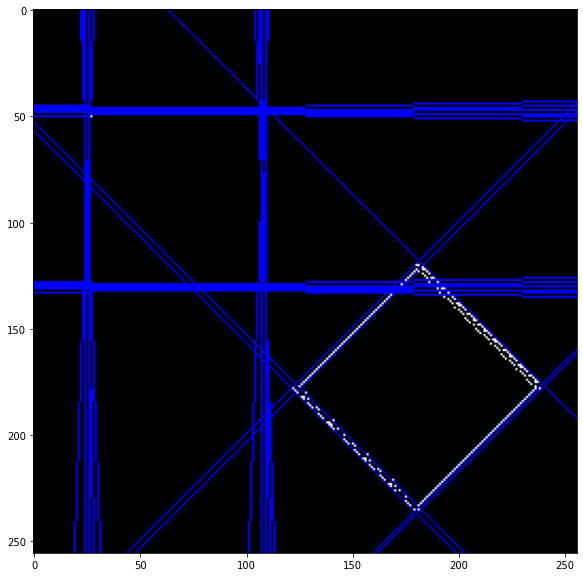

In [15]:
show_lines(kwadraty, 45, 25, 0)

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

In [16]:
def show_linesP(img, threshold=25, minLineLength=40, maxLineGap=5):
  dst = cv2.Canny(img, 0, 1, None, 3)
  cdstP = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
  linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, threshold, minLineLength, maxLineGap)
    
  if linesP is not None:
    for i in range(0, len(linesP)):
      l = linesP[i][0]
      cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1)

  plt.figure(figsize=(10, 10))
  plt.imshow(cdstP)
  plt.show()

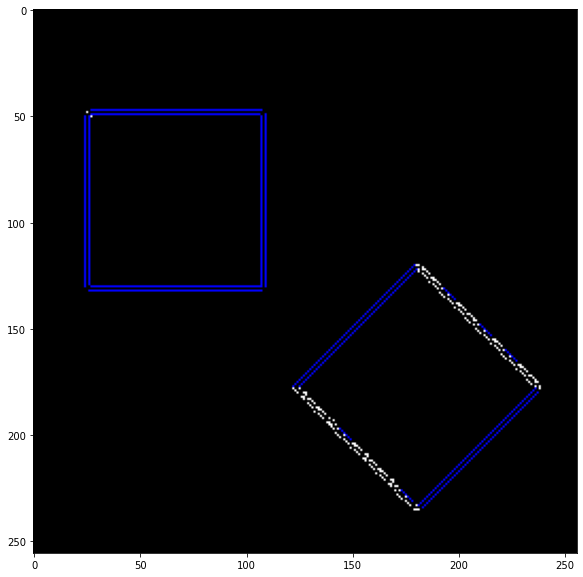

In [17]:
show_linesP(kwadraty)

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

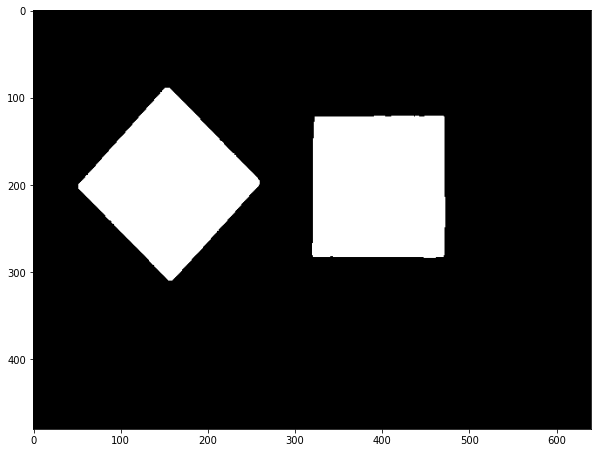

In [18]:
lab112 = np.uint8(cv2.imread("lab112.png", cv2.IMREAD_GRAYSCALE) < 40)
lab112 = cv2.morphologyEx(lab112, cv2.MORPH_OPEN, np.ones((5,5)))

plt.figure(figsize=(10,10))
plt.imshow(lab112, cmap='gray')
plt.show()

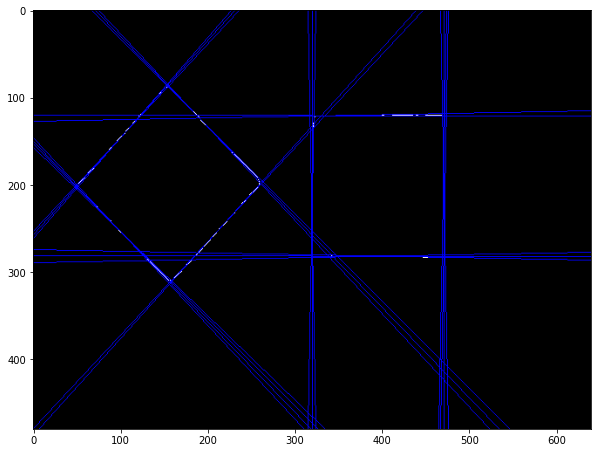

In [19]:
show_lines(lab112, 56, 40, 0)

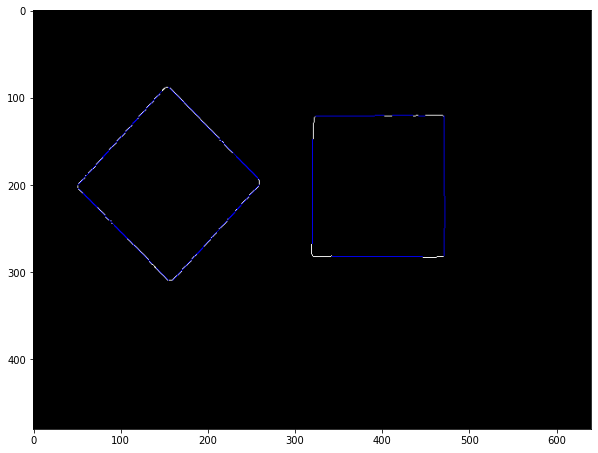

In [20]:
show_linesP(lab112)

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

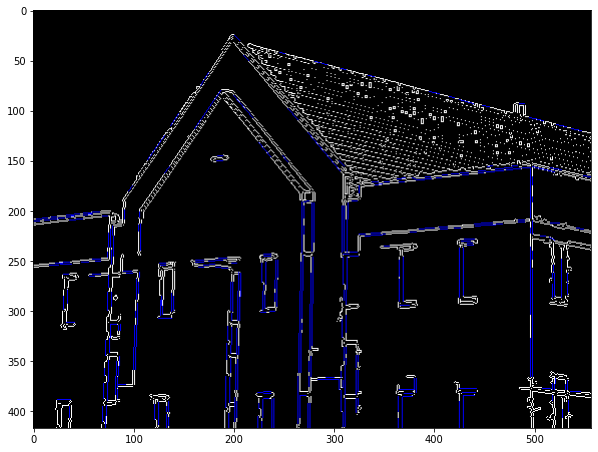

In [21]:
dom = cv2.imread('dom.png', cv2.COLOR_BGR2GRAY)

dom_canny = cv2.Canny(dom, 100, 255, None, 3, 1)

show_linesP(dom_canny, 20, 50, 5)